<a href="https://colab.research.google.com/github/yuli-05/CarPrice/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos Personales**
Nombre del alumno: Julissa Dominguez Badillo

Grupo: IDGS91

Matricula: 1718110384


# **3.1 Análisis del dataset Car Price**

# **Importar librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Cargar dataset**

In [2]:
dataframe = pd.read_csv("car_price_assignment.csv")

# **Forma del dataset**
Tamaño (filas y columnas) que tiene nuestro dataset.

In [3]:
dataframe.shape

(205, 26)

# **N número de primeros registros**
Dentro del paréntesis se puede especificar cuantos registros se muestren.

In [4]:
dataframe.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **N número de últimos registros**

In [5]:
dataframe.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# **Contar valores nulos**

In [6]:
dataframe.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# **Ver información del dataset**
Un ejemplo de la información que podemos obtener son los tipos de datos existentes dentro del dataset.

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# **Promedio de cada columna**

In [8]:
dataframe.mean()

car_ID                103.000000
symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

# **Función para obtener media, moda y mediana**

In [9]:
cols = ['symboling','wheelbase','carlength','carwidth'] #Selección de las columnas
for col in cols:
  print("Columna {} : Mean {}".format(col,dataframe[col].mean()))
  print("Columna {} : Median {}".format(col,dataframe[col].median()))
  print("Columna {} : Mode {}".format(col,dataframe[col].mode()))

Columna symboling : Mean 0.8341463414634146
Columna symboling : Median 1.0
Columna symboling : Mode 0    0
dtype: int64
Columna wheelbase : Mean 98.75658536585378
Columna wheelbase : Median 97.0
Columna wheelbase : Mode 0    94.5
dtype: float64
Columna carlength : Mean 174.04926829268305
Columna carlength : Median 173.2
Columna carlength : Mode 0    157.3
dtype: float64
Columna carwidth : Mean 65.90780487804875
Columna carwidth : Median 65.5
Columna carwidth : Mode 0    63.8
dtype: float64


# **Describir el dataset**
Nos mostrará un poco más de cada una de las columnas que tiene nuestro dataset.

In [10]:
dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# **Correlación entre pares de columnas**
La correlación nos ayuda a que si llega a haber un cambio en cierta variable

In [11]:
dataframe.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


# **Graficar la correlación entre columnas con un HEATMAP**
Este mapa de calor es una representación grafica de lo que obtuvimos en el punto anterior. Y así poder visualizar de una mejor manera las correlaciones existentes.

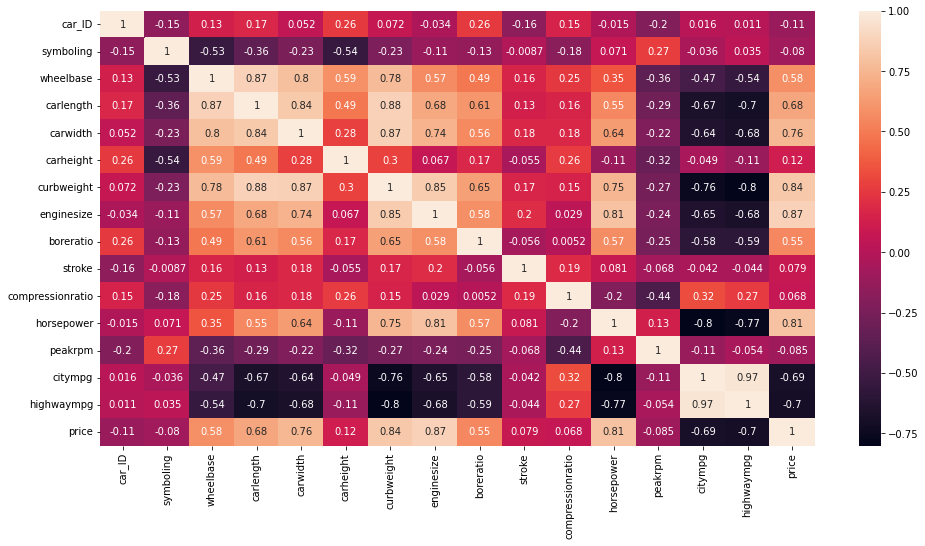

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(dataframe.corr(),annot=True)
plt.show()

# **Seleccionar columnas con una correlación específica**
Definimos un método que nos ayudará a filtrar correlaciones que pertencezcan a un cierto número de correlación.

In [13]:
def correlation(dataframe,threshold):
  cols_corr = set()
  corr_matrix = dataframe.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) >= threshold:
                 col_name = corr_matrix.columns[i]
                 cols_corr.add(col_name)
  return cols_corr

In [14]:
corr_cols = correlation(dataframe.iloc[:,:-1],0.80)
corr_cols

{'carlength',
 'carwidth',
 'citympg',
 'curbweight',
 'enginesize',
 'highwaympg',
 'horsepower'}

# **Separar columnas categóricas**
No númericos

In [15]:
def categorical(dataframe):
  categorical_col = []
  for col in dataframe:
    if dataframe[col].dtype == 'object':
      categorical_col.append(col)
  return categorical_col

In [16]:
categorical_col = categorical(dataframe)
print(categorical_col)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


# **Separar columnas categóricas**
Númericos

In [17]:
def numerical(dataframe):
  numerical_col = []
  for col in dataframe:
    if dataframe[col].dtype != 'object':
      numerical_col.append(col)
  return numerical_col

In [18]:
numerical_col = numerical(dataframe)
print(numerical_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


# **Remover una columna**

In [19]:
print(len(categorical_col))
#categorical_col.remove('CarName')

10


In [21]:
print(len(categorical_col))

10


# **Graficar una sola columna**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

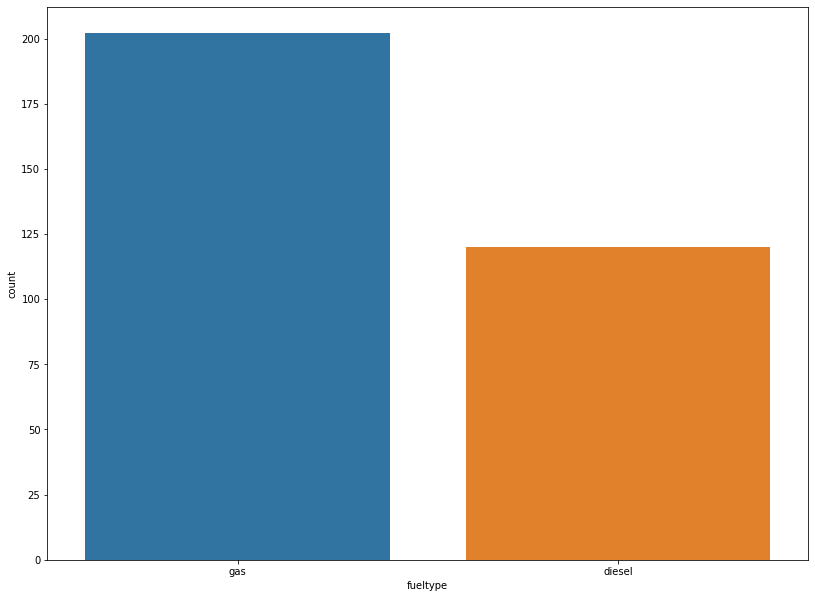

In [22]:
i = 1
plt.figure(figsize=(30,120))
for col in categorical_col:
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(dataframe[col])

sns.countplot(dataframe['fueltype'])

# **Graficar todas las columnas categóricas**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

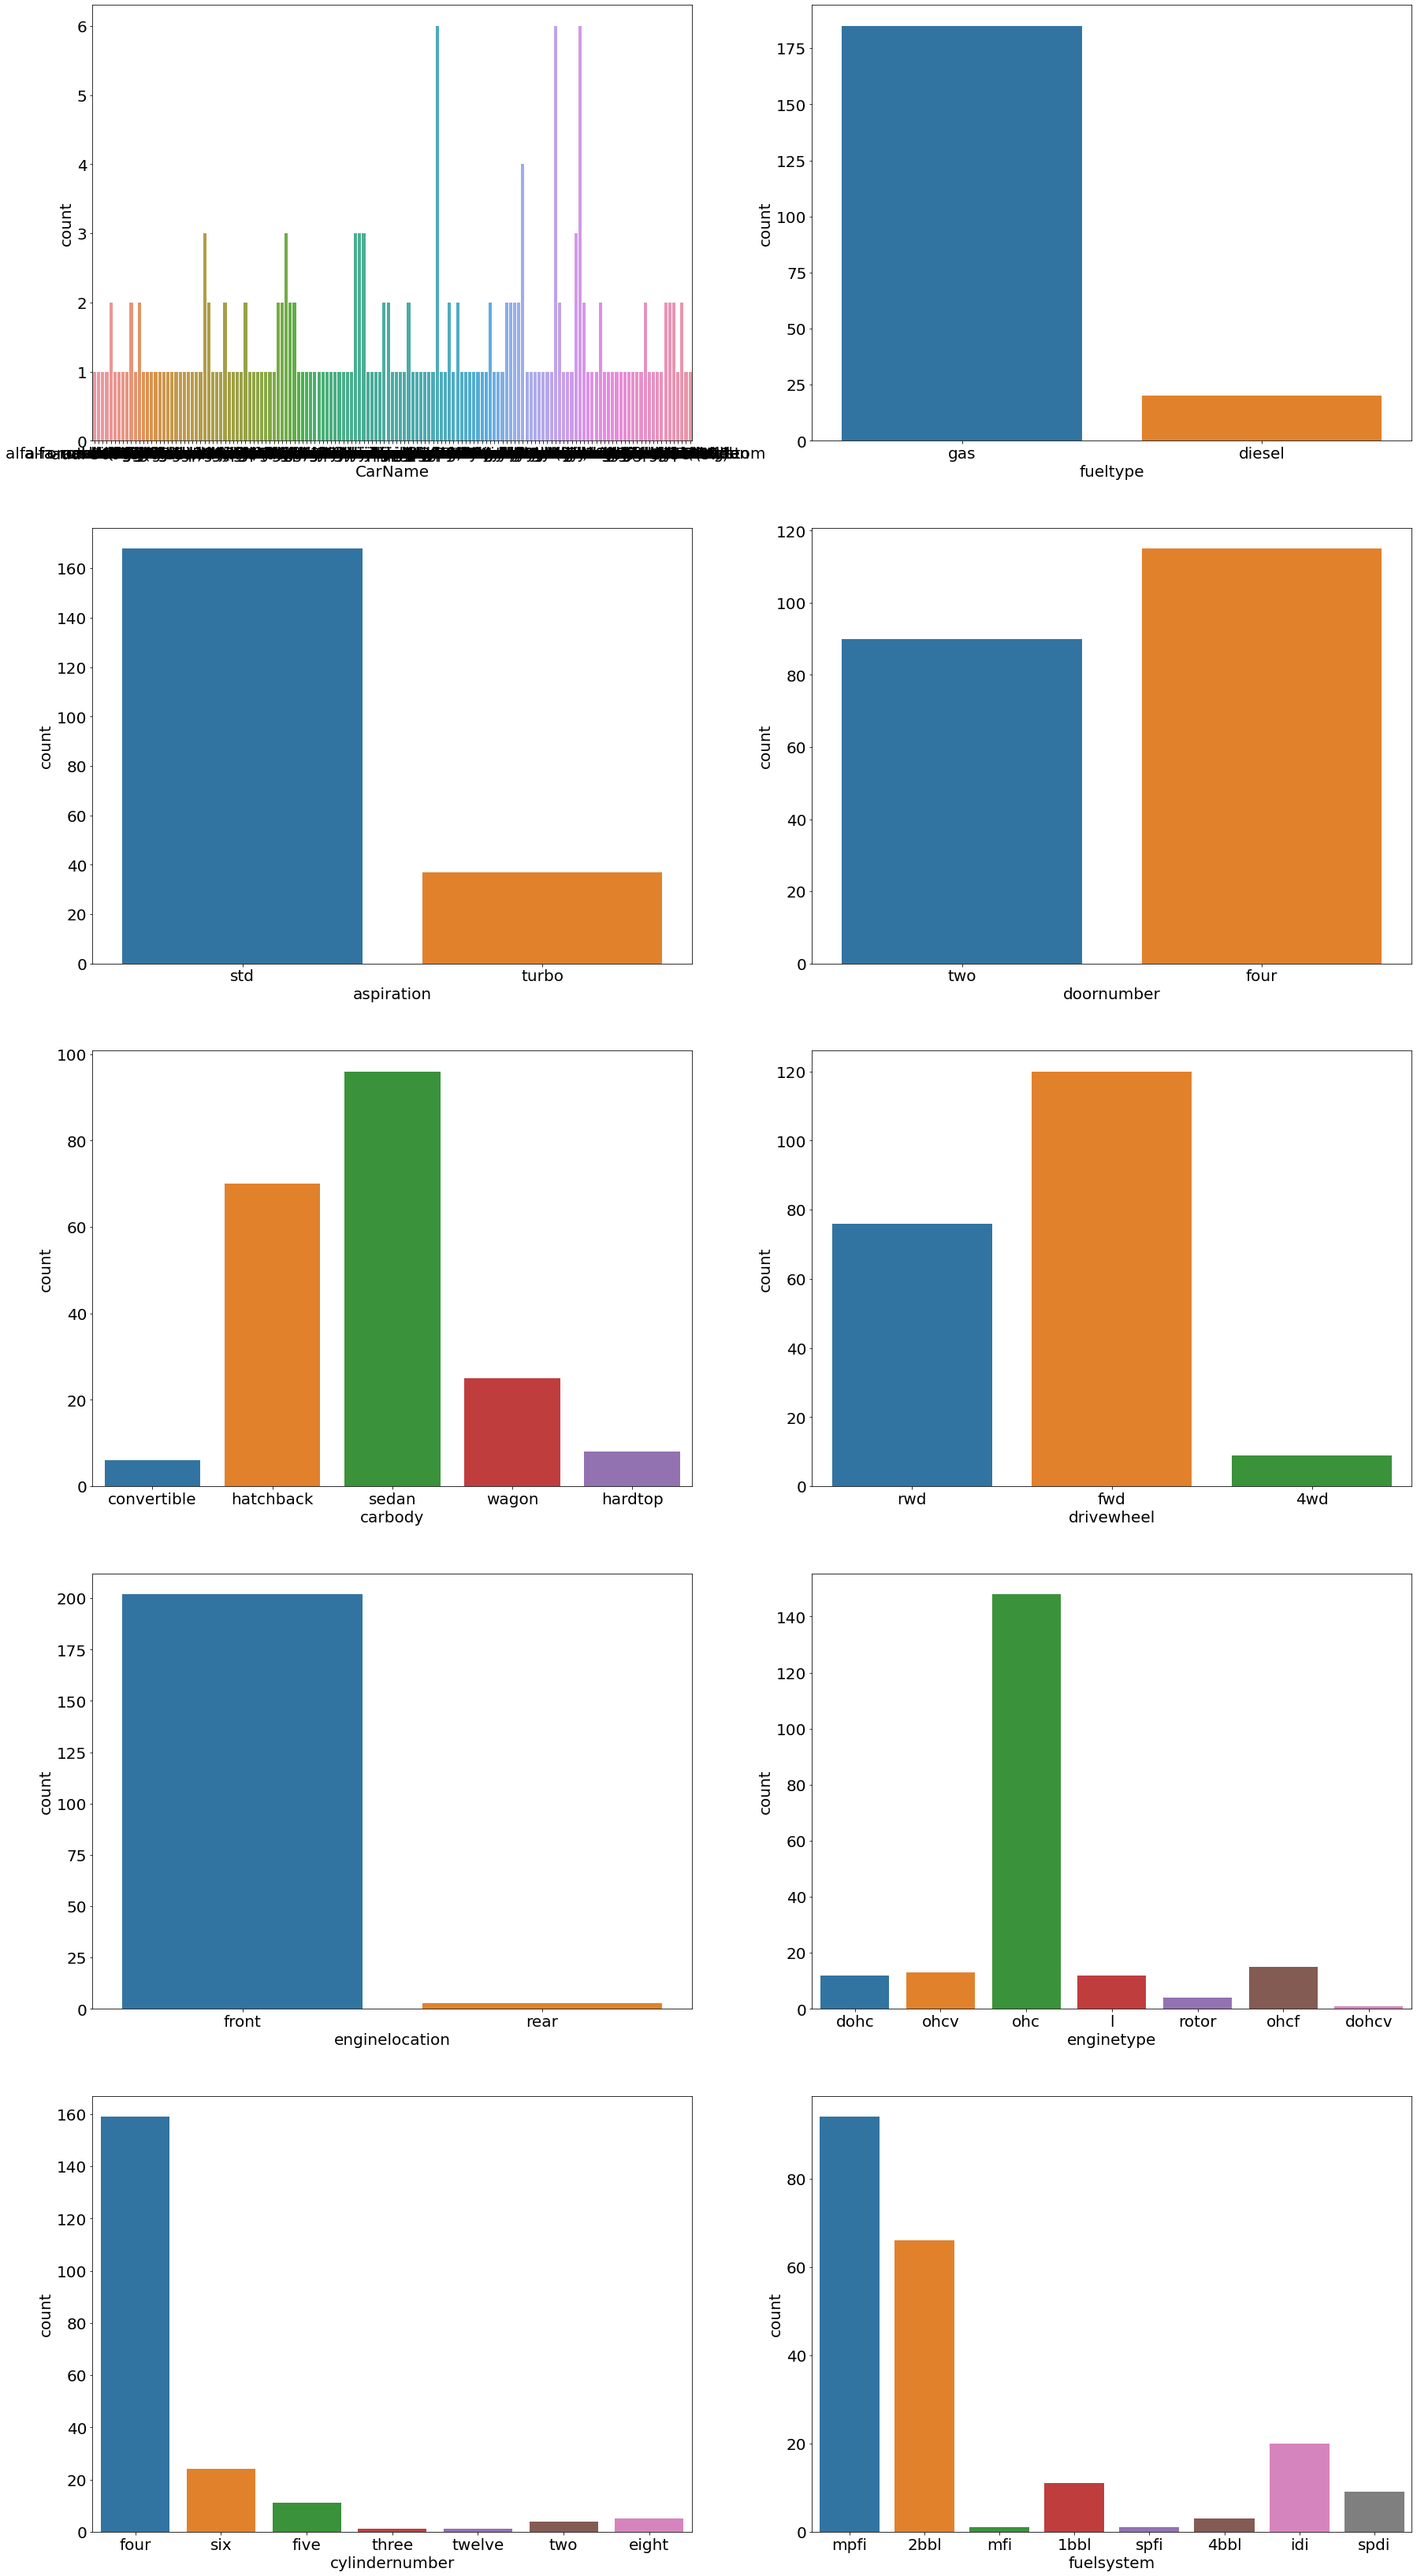

In [23]:
i=1
plt.figure(figsize=(30,120))
for col in categorical_col:
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(dataframe[col])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i + 1

# **Graficar columnas categóricas COUNT y BOX PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

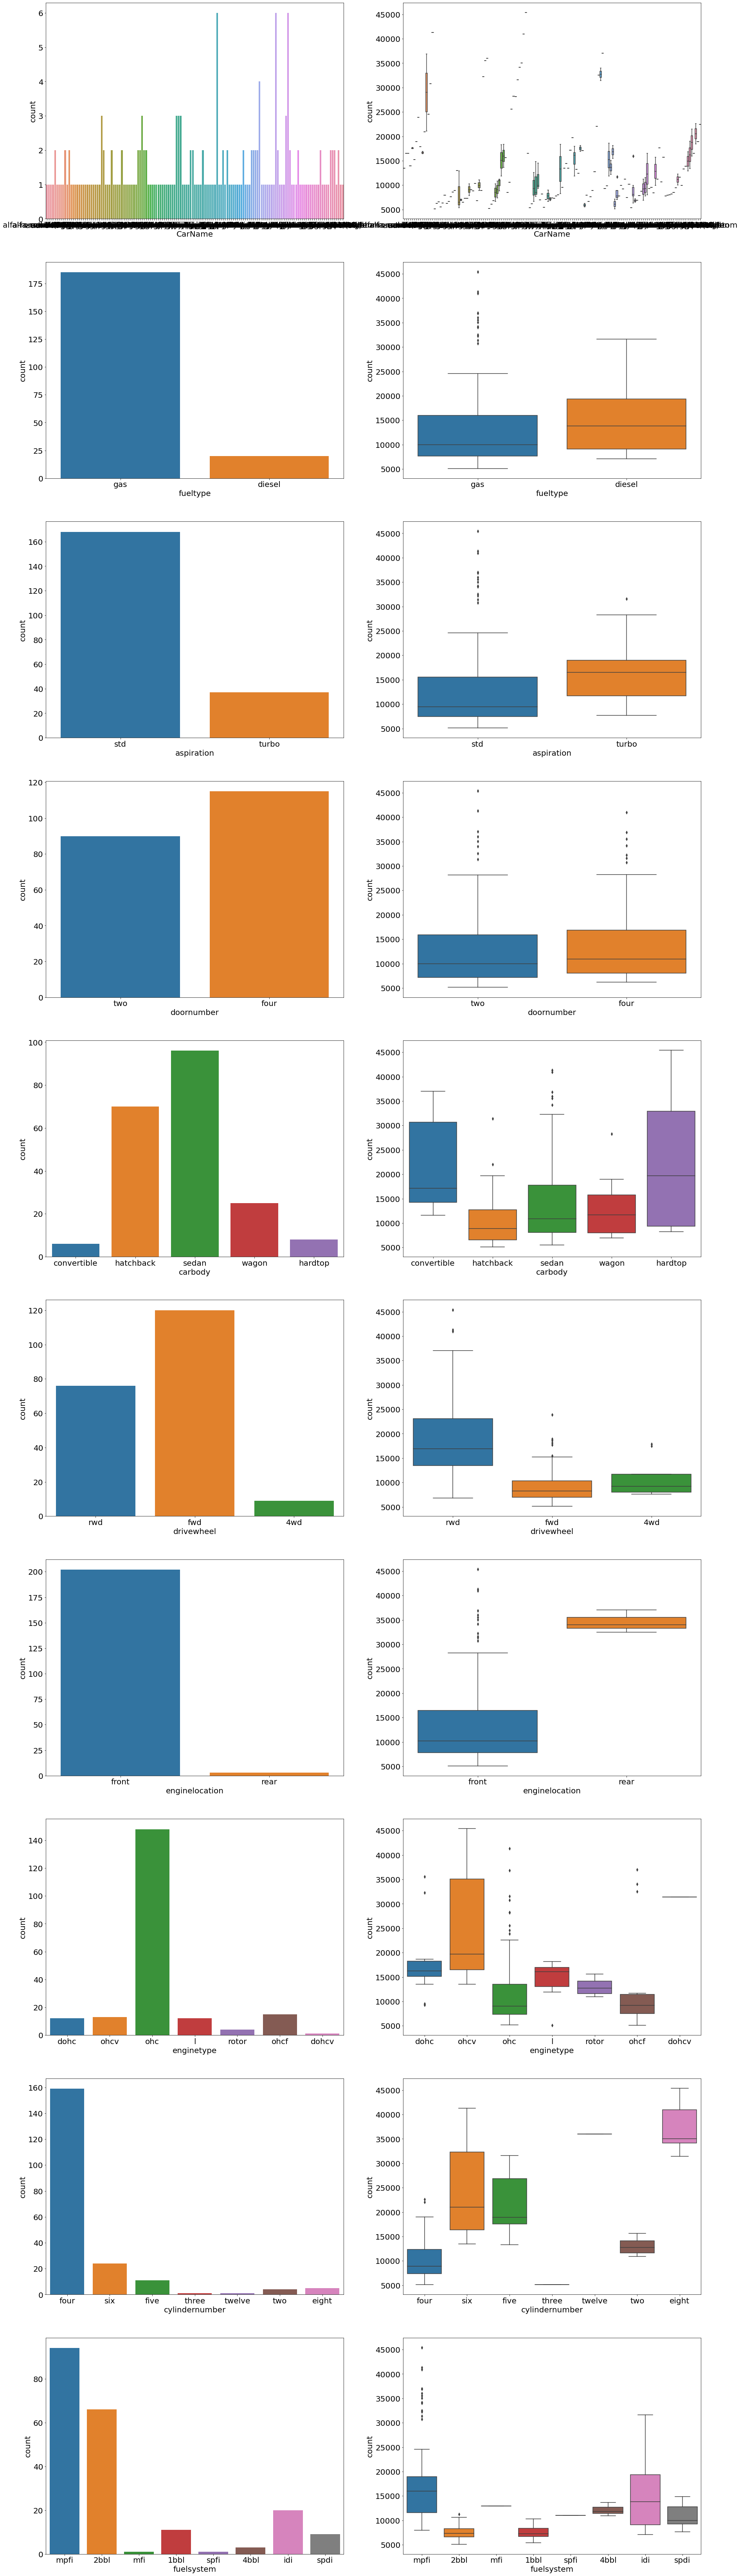

In [24]:
i=1
plt.figure(figsize=(30,120))
for col in categorical_col:
  # COUNT PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(dataframe[col])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i+1

  # BOX PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.boxplot(x=dataframe[col],y=dataframe['price'])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i+1
plt.show()

# **Graficar columnas numéricas**

In [25]:
numerical_col

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [26]:
numerical_col.remove('car_ID')
numerical_col.remove('price')

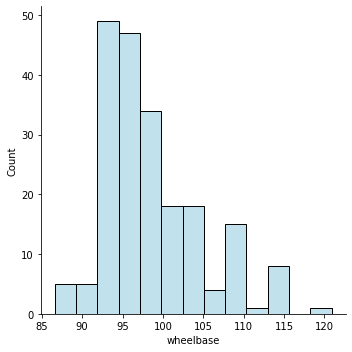

In [27]:
sns.displot(dataframe['wheelbase'],color='lightblue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

<function matplotlib.pyplot.show>

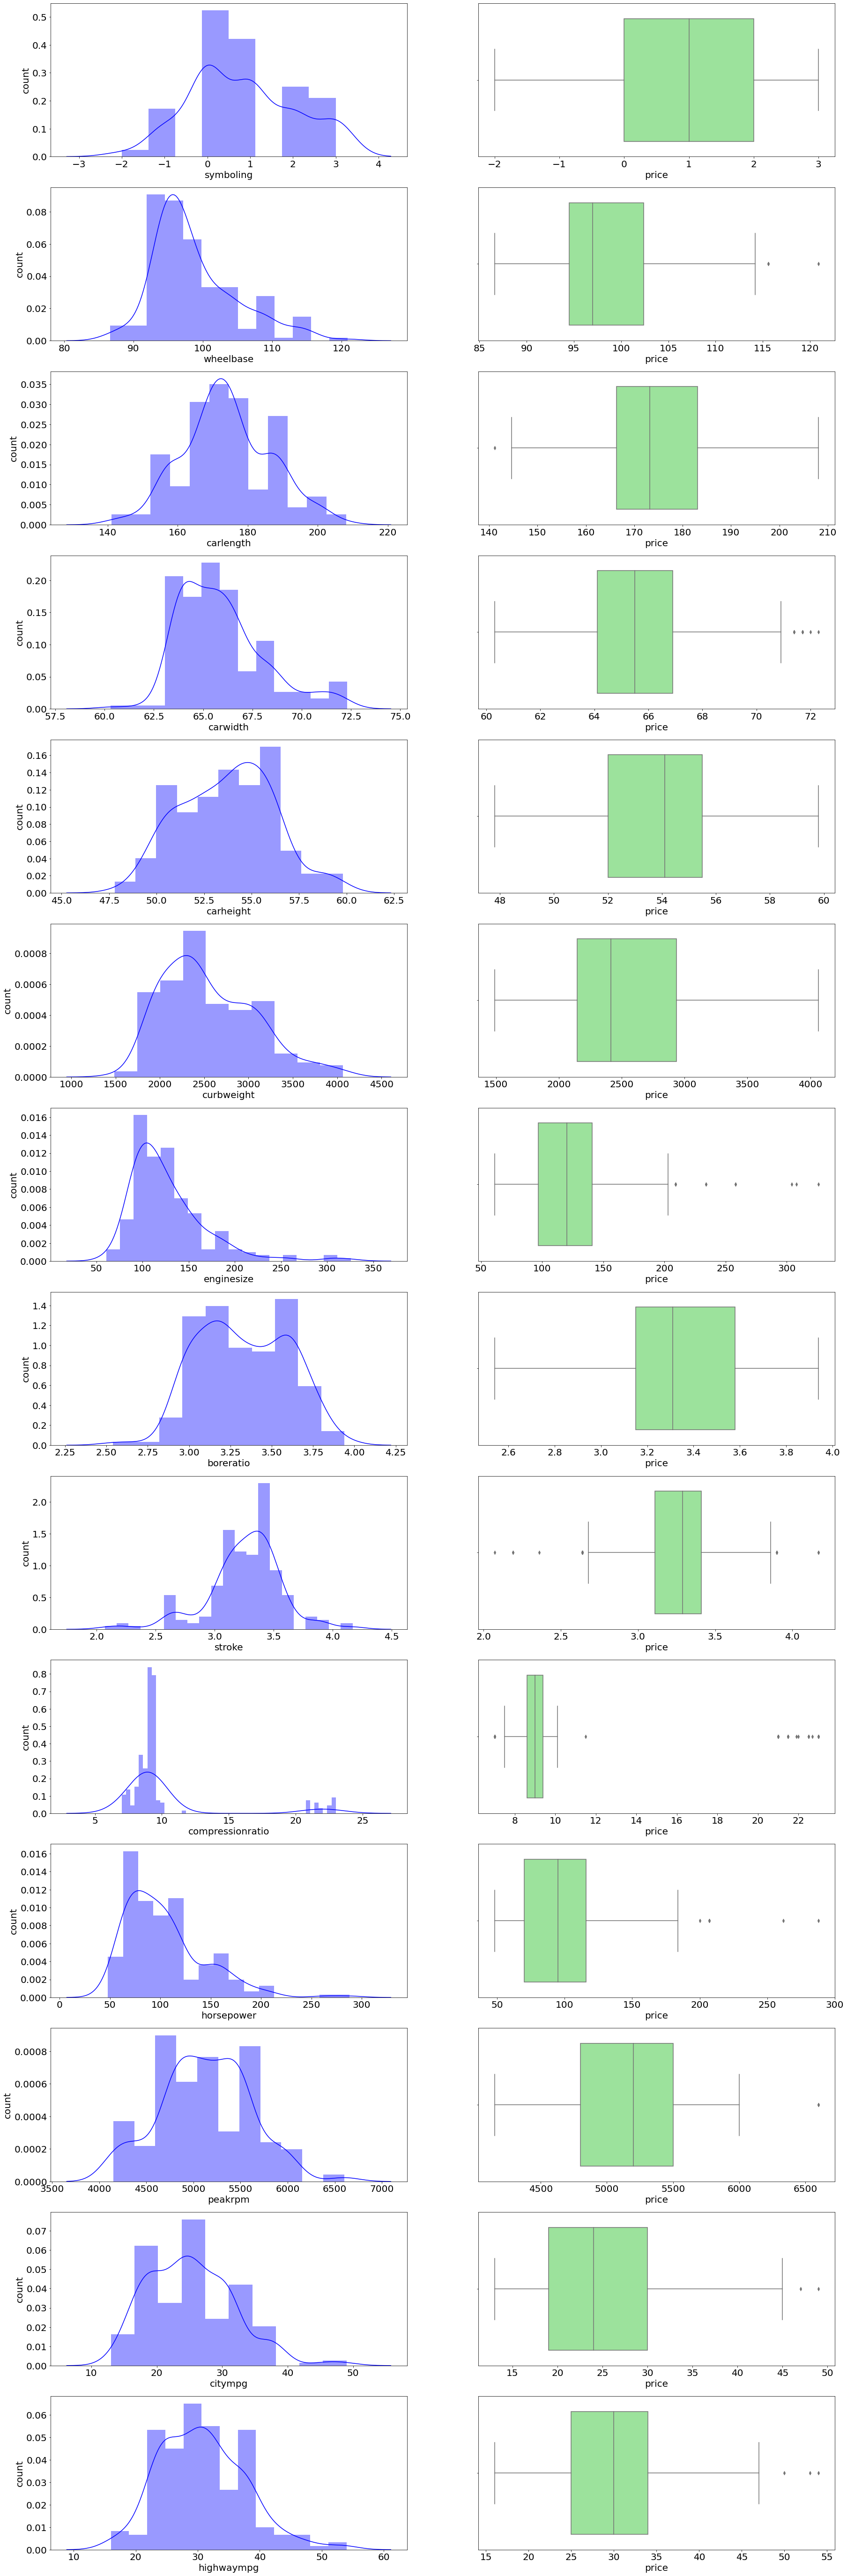

In [28]:
i=1
plt.figure(figsize=(30,100))
for col in numerical_col:
  plt.subplot(len(numerical_col),2,i)
  sns.distplot(dataframe[col],color='blue')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i + 1
  plt.subplot(len(numerical_col),2,i)
  sns.boxplot(dataframe[col],color="lightgreen")
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.xlabel("price",fontsize=20)

  i = i + 1

plt.show

# **Conclusiones**

Como conclusion puedo decir que con estas actividades cada vez vamos aprendiendo mejor los codigos y vamos aprendiendo para que se utiliza cada uno.

La regresión lineal es una técnica estadística destinada a analizar por qué pasan las cosas o cuáles son las principales explicaciones de algún fenómeno. En este caso Las variables que son útiles para describir las variaciones en los precios de los automóviles son aspiración, ubicación del motor, ancho del automóvil, peso en vacío, tipo de motor, número de cilindro, carrera, rpm pico, precio. 